In [2]:
from astropy.io import fits
from astropy.wcs import WCS
import astropy.units as u
import astropy.coordinates as coords
from astropy.nddata import Cutout2D
import matplotlib.pyplot as plt
from regions import Regions
from spectral_cube import SpectralCube

In [3]:
chan_range = {16: [3486.1, 4278.1], #[128, 268],
              31: [3849.6, 4444.7], #[270, 375],
              91: [7508.3, 6613.0]} #[595, 750]}

In [11]:
# def crop_fits(hcg, chans=chan_range):
#     f = f'hcg_cubes/hcg{hcg}_line60_masked.pb_corr_vopt.fits'
#     freg = f'hcg_cubes/box_hcg{hcg}.reg'
#     chans = chan_range[hcg]
#     reg = Regions.read(freg, format='crtf')
#     d, h = fits.getdata(f, header=True)
#     wcs = WCS(h)
#     if len(reg) == 1:
#         ccoo = reg[0].center
#         width, height = reg[0].width, reg[0].height
#     else:
#         raise Exception('region must be a single box')

#     dims = d.shape
#     if len(dims) > 3: d = d[0]

#     sub_d = []
#     for k in range(chans[0], chans[1]):
#         cutout = Cutout2D(d[k], position=ccoo, size=(height,width), wcs=wcs.celestial)
#         sub_d.append(cutout.data)
#     sub_d = np.array(sub_d)

#     new_hdr = cutout.wcs.to_header()
#     new_hdu = fits.PrimaryHDU(data=sub_d, header=new_hdr)
#     new_hdu.writeto(f'hcg_cubes/hcg{hcg}_cropped.fits', overwrite=True)
#     return sub_d

def crop_fits(hcg, chans=chan_range, input_type='image'):
    if input_type == 'image':
        f = f'hcg_cubes/hcg{hcg}_line60_masked.pb_corr_vopt.fits'
        append = ''
    elif input_type == 'mask':
        f = f'hcg_cubes/hcg{hcg}_line60_masked.pb_corr_vopt_mask.fits'
        append = 'mask_'
    freg = f'hcg_cubes/box_hcg{hcg}.reg'
    chans = chan_range[hcg]
    reg = Regions.read(freg, format='crtf')
    
    cube = SpectralCube.read(f)
    cube_kms = cube.with_spectral_unit(u.km/u.s, velocity_convention='optical', rest_value=1420405752*u.Hz)
    if len(reg) == 1:
        ccoo = reg[0].center
        width, height = reg[0].width, reg[0].height
    else:
        raise Exception('region must be a single box')
    sub_cube_radec = cube_kms.subcube(xlo=ccoo.ra+0.5*width, xhi=ccoo.ra-0.5*width,
                                  ylo=ccoo.dec-0.5*height, yhi=ccoo.dec+0.5*height)
    sub_cube = sub_cube_radec.spectral_slab(min(chans)*u.km/u.s, max(chans)*u.km/u.s)

    sub_cube.hdu.writeto(f'hcg_cubes/hcg{hcg}_{append}cropped.fits', overwrite=True)
    return sub_cube.hdu.data

def crop_fits_highres(hcg, chans=chan_range, input_type='image'):
    if input_type == 'image':
        f = f'hcg_cubes/hcg{hcg}_largebw_HCG31_hcg31_line15_masked.image.fits'
        append = ''
    elif input_type == 'mask':
        f = f'hcg_cubes/hcg{hcg}_largebw_HCG31_hcg31_line15_masked.image.sofia_mask.fits'
        append = 'mask_'
    freg = f'hcg_cubes/box_hcg{hcg}.reg'
    chans = chan_range[hcg]
    reg = Regions.read(freg, format='crtf')
    cube = SpectralCube.read(f)
    cube_kms = cube.with_spectral_unit(u.km/u.s, velocity_convention='optical', rest_value=1420405752*u.Hz)
    if len(reg) == 1:
        ccoo = reg[0].center
        width, height = reg[0].width, reg[0].height
    else:
        raise Exception('region must be a single box')
    sub_cube_radec = cube_kms.subcube(xlo=ccoo.ra+0.5*width, xhi=ccoo.ra-0.5*width,
                                  ylo=ccoo.dec-0.5*height, yhi=ccoo.dec+0.5*height)
    sub_cube = sub_cube_radec.spectral_slab(min(chans)*u.km/u.s, max(chans)*u.km/u.s)

    sub_cube.hdu.writeto(f'hcg_cubes/hcg{hcg}_{append}cropped_15as.fits', overwrite=True)
    return sub_cube.hdu.data

In [13]:
d = crop_fits_highres(31, input_type='mask')

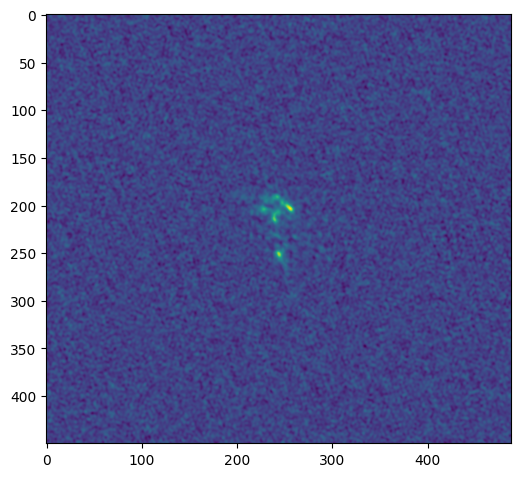

In [10]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.imshow(d[62])

In [86]:
d.hdu.data

array([[[-5.1485025e-04, -4.3337664e-04, -2.0203475e-04, ...,
         -7.5821185e-06,  1.8175603e-04,  2.8948835e-04],
        [-6.5198384e-04, -7.1535254e-04, -6.1359082e-04, ...,
         -1.3409530e-04,  1.5280912e-04,  3.2690790e-04],
        [-6.1650301e-04, -7.8933011e-04, -7.9191249e-04, ...,
         -3.1745026e-04,  1.0341032e-05,  2.5128375e-04],
        ...,
        [ 6.4143591e-04,  4.5882471e-04,  1.2310395e-04, ...,
         -7.2556332e-04, -4.4191495e-04, -1.1730578e-04],
        [ 7.7307975e-04,  7.1114727e-04,  5.0512562e-04, ...,
         -6.8909331e-04, -3.5983039e-04, -8.8923171e-06],
        [ 6.9335807e-04,  7.7894173e-04,  7.6362072e-04, ...,
         -5.6045165e-04, -2.1410745e-04,  1.3360938e-04]],

       [[ 3.8366287e-04,  5.4842432e-04,  7.8520708e-04, ...,
         -7.6633391e-05, -2.3928809e-04, -4.7601209e-04],
        [-5.0833023e-05,  2.5238958e-04,  6.0825760e-04, ...,
         -9.6583783e-05, -1.8065143e-04, -3.3840162e-04],
        [-4.5651407e-04, 